In [1]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import pandas as pd

In [2]:
fig_size = (8, 2.5)

In [3]:
method_list = ['linear_L1reg.100', 'mmit.100', 'AFT_XGboost.100', 'mlp', 'lstm', 'gru']
method_order = ['mmit', 'linear_L1reg', 'AFT_XGboost', 'mlp', 'lstm', 'gru']

In [4]:
def plot_acc_fold(dataset):
    acc_df = pd.read_csv(f"../acc_rate_csvs/{dataset}.csv")
    acc_df = acc_df[acc_df['method'].isin(method_list)]
    acc_df['method'] = acc_df['method'].str.split('.').str[0]
    
    # Set figure size
    plt.figure(figsize=fig_size)

    # Sort the DataFrame by accuracy and exclude the first row
    sorted_acc_df = acc_df.sort_values(by='acc', ascending=True)
    sorted_acc_df = sorted_acc_df.iloc[2:, :]

    # Initialize empty lists to store legend handles
    proposed_handle = None
    previous_handle = None

    # Loop through each method in the custom order and plot accuracy for each fold
    for method in method_order:
        if method in sorted_acc_df['method'].unique():
            method_data = sorted_acc_df[sorted_acc_df['method'] == method]
            
            # Set color based on method
            edgecolor = 'red' if method in ['mlp', 'rnn', 'lstm', 'gru'] else 'black'
            
            # Scatter plot
            plt.scatter(method_data['acc'], [method]*len(method_data), s=50, marker='D', color='white', edgecolor=edgecolor, linewidth=1)

            # Create custom legend handles with the same style as the scatter
            if method == 'gru' and proposed_handle is None:
                proposed_handle = mlines.Line2D([], [], color='white', marker='D', markeredgecolor=edgecolor, linestyle='None', label='Proposed')
            elif method != 'gru' and previous_handle is None:
                previous_handle = mlines.Line2D([], [], color='white', marker='D', markeredgecolor=edgecolor, linestyle='None', label='Previous')

    # Add labels and title
    plt.xlabel('Accuracy (acc)')
    plt.ylabel('Method')
    plt.title('Accuracy per Fold for Each Method')
    plt.grid(True)

    # Add custom legend handles
    plt.legend(handles=[previous_handle, proposed_handle])

    # Show plot
    plt.show()

In [5]:
def plot_acc_mean(dataset):
    acc_df = pd.read_csv(f"../acc_rate_csvs/{dataset}.csv")
    acc_df = acc_df[acc_df['method'].isin(method_list)]
    acc_df['method'] = acc_df['method'].str.split('.').str[0]
    
    plt.figure(figsize=fig_size)

    # Compute mean and standard deviation for each method
    method_stats = acc_df.groupby('method')['acc'].agg(['mean', 'std']).reset_index()
    method_stats.columns = ['method', 'mean', 'std']  # Rename columns

    # Set the method column as a categorical variable with the custom order
    method_stats['method'] = pd.Categorical(method_stats['method'], categories=method_order, ordered=True)
    method_stats = method_stats.sort_values('method')  # Sort by the custom order

    # Create a mask for the GRU method
    is_rnn = method_stats['method'].isin(['mlp', 'rnn', 'lstm', 'gru'])

    # Plot the mean as a point and the standard deviation as error bars
    plt.errorbar(method_stats['mean'][~is_rnn], method_stats['method'][~is_rnn],
                xerr=0.25 * method_stats['std'][~is_rnn], fmt='D', color='black', ecolor='black', elinewidth=1, capsize=4, markersize=6)

    plt.errorbar(method_stats['mean'][is_rnn], method_stats['method'][is_rnn],
                xerr=0.25 * method_stats['std'][is_rnn], fmt='D', color='red', ecolor='red', elinewidth=1, capsize=4, markersize=6)

    # Add labels and title
    plt.xlabel('Accuracy (acc)')
    plt.ylabel('Method')
    plt.title('Mean Accuracy and Standard Deviation per Method')
    plt.grid(True)

    # Create custom legend handles
    previous_legend = mlines.Line2D([], [], color='black', marker='D', linestyle='None', label='Previous')
    proposed_legend = mlines.Line2D([], [], color='red', marker='D', linestyle='None', label='Proposed')

    # Add custom legend
    plt.legend(handles=[previous_legend, proposed_legend])

    # Show plot
    plt.show()

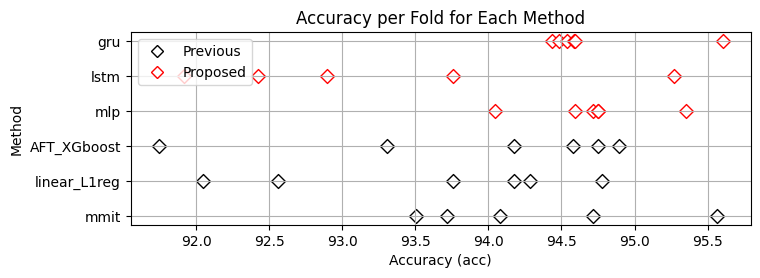

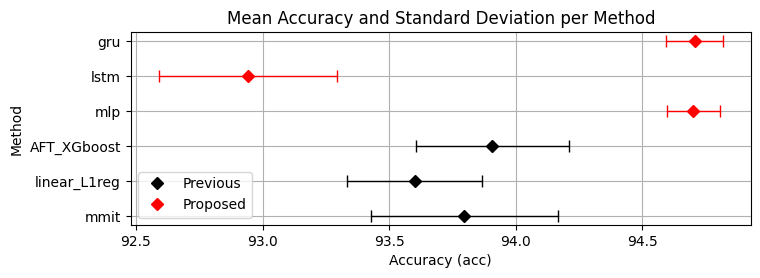

In [6]:
plot_acc_fold('detailed')
plot_acc_mean('detailed')

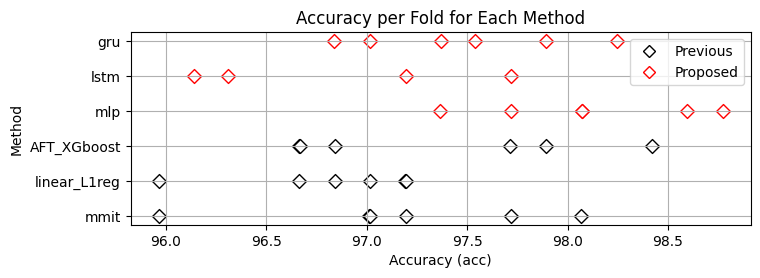

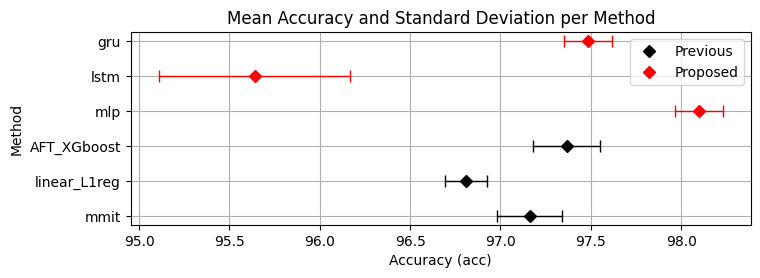

In [7]:
plot_acc_fold('systematic')
plot_acc_mean('systematic')